Набор данных Panel Study of Income Dynamics (PSID) содержит информацию о 4856 человек. Он содержит их возраст, образование, заработок, количество часов, количество детей и их семейное положение. Мы пытаемся проанализировать, влияет ли количество часов работы человека на его заработок.

**Импорт и настройка рабочей области**

In [3]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat

In [2]:
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

**Загрузка данных и предварительный просмотр**

In [4]:
my_data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/file/main/PSID.csv')
my_data.head()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Seq No    4856 non-null   int64  
 1   intnum    4856 non-null   int64  
 2   persnum   4856 non-null   int64  
 3   age       4856 non-null   int64  
 4   educatn   4855 non-null   float64
 5   earnings  4856 non-null   int64  
 6   hours     4856 non-null   int64  
 7   kids      4856 non-null   int64  
 8   married   4856 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 341.6+ KB


4856<br>
educatn  - 1 пропуск<br>
married   тип  object

**Удалим 3 столбца**

In [6]:
my_data = my_data.drop(["Seq No", "intnum", "persnum"], axis=1)
my_data.head()

,age,educatn,earnings,hours,kids,married
0,39,12.0,77250,2940,2,married
1,35,12.0,12000,2040,2,divorced
2,33,12.0,8000,693,1,married
3,39,10.0,15000,1904,2,married
4,47,9.0,6500,1683,5,married


**Описание data set**

In [7]:
print('Data set size = ', my_data.shape)
print('Dimension = ', my_data.ndim)

Data set size =  (4856, 6)
Dimension =  2


In [8]:
my_data.dtypes

,0
age,int64
educatn,float64
earnings,int64
hours,int64
kids,int64
married,object


?
married  
educatn     float64

In [9]:
my_data.describe()

,age,educatn,earnings,hours,kids
count,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,5.595116,18.449502,15985.447449,947.175837,14.887856
min,30.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,12.000000,85.000000,32.000000,1.000000
50%,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,50.000000,99.000000,240000.000000,5160.000000,99.000000


**Обработав недостающие значения, заполните их средним значением столбца.**

In [10]:
## Find columns with NaN values
my_data.isna().any()

,0
age,False
educatn,True
earnings,False
hours,False
kids,False
married,False


In [11]:
my_data['educatn'] = my_data['educatn'].fillna(my_data['educatn'].mean())
my_data.isna().any()

,0
age,False
educatn,False
earnings,False
hours,False
kids,False
married,False


**Общие сведения о распределении данных и поиск недопустимых данных**

Text(0.5, 0, 'Education level')

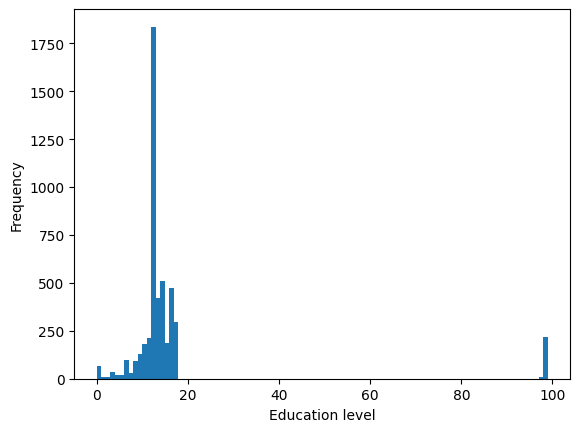

In [12]:
my_data['educatn'].plot(kind='hist', bins=100)
plt.xlabel('Education level')

Text(0.5, 0, 'Number of kids')

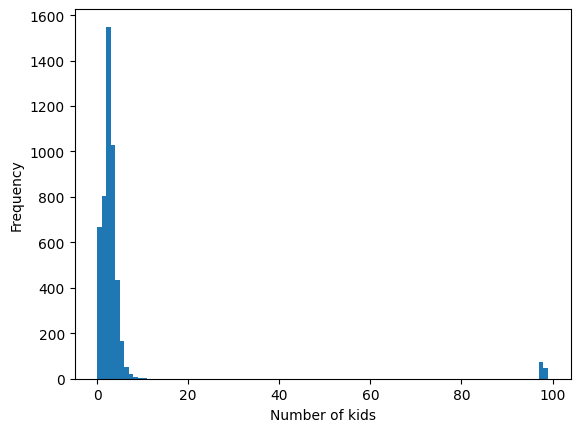

In [13]:
my_data['kids'].plot(kind='hist', bins=100)
plt.xlabel('Number of kids')

Text(0.5, 0, 'Earnings')

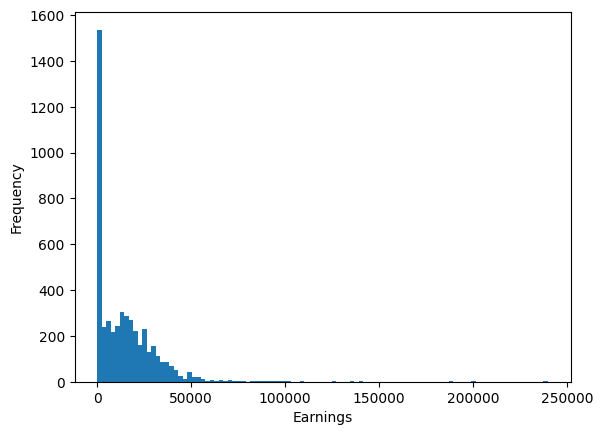

In [14]:
my_data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('Earnings')

Text(0.5, 0, 'Hours')

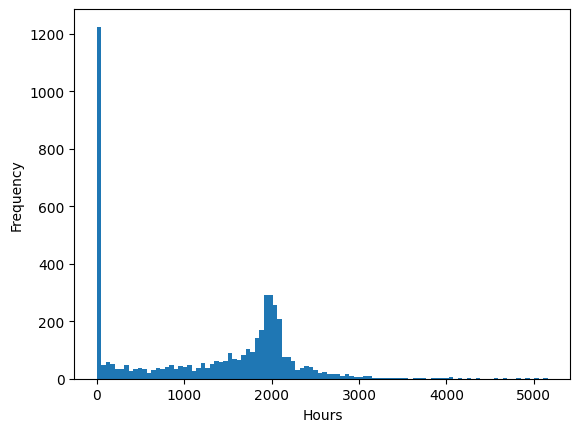

In [15]:
my_data['hours'].plot(kind='hist', bins=100)
plt.xlabel('Hours')

**Удалить недействительные данные (ограничение < детей = 20 и образование < = 20 и заработок < = 150000 и часов>0)**

Text(0.5, 0, 'Education Level')

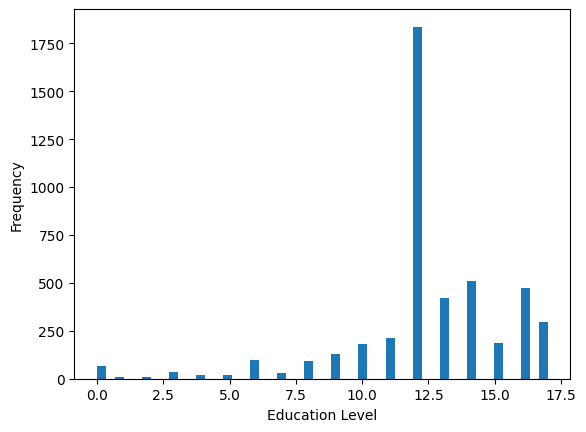

In [16]:
my_data = my_data.drop(my_data[my_data.educatn > 20].index)
my_data['educatn'].plot(kind='hist', bins=50)
plt.xlabel('Education Level')

Text(0.5, 0, 'Number of Kids')

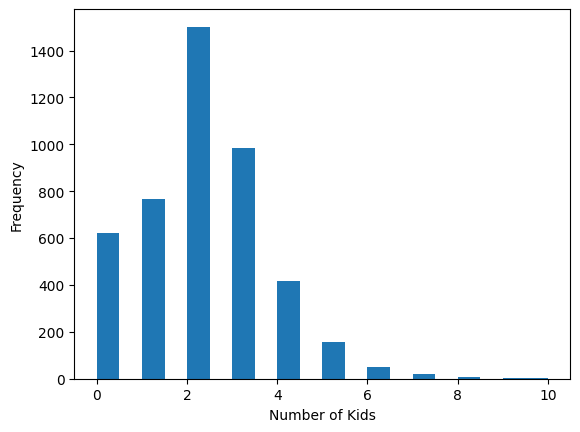

In [17]:
my_data = my_data.drop(my_data[my_data.kids > 20].index)
my_data['kids'].plot(kind='hist', bins=20)
plt.xlabel('Number of Kids')

Text(0.5, 0, 'earnings')

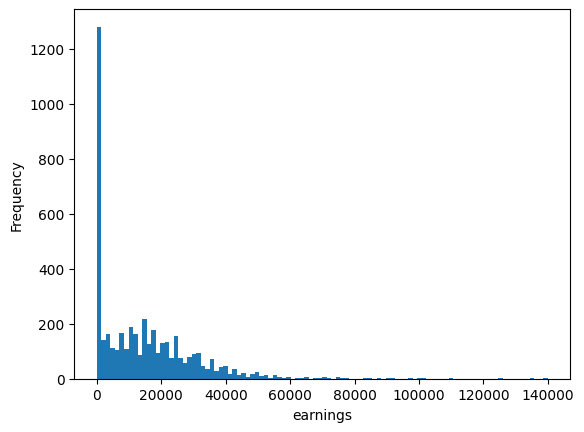

In [18]:
my_data = my_data.drop(my_data[my_data.earnings > 150000].index)
## my_data = my_data.drop(my_data[my_data.earnings == 0].index)
my_data['earnings'].plot(kind='hist', bins=100)
plt.xlabel('earnings')

Text(0.5, 0, 'Hours')

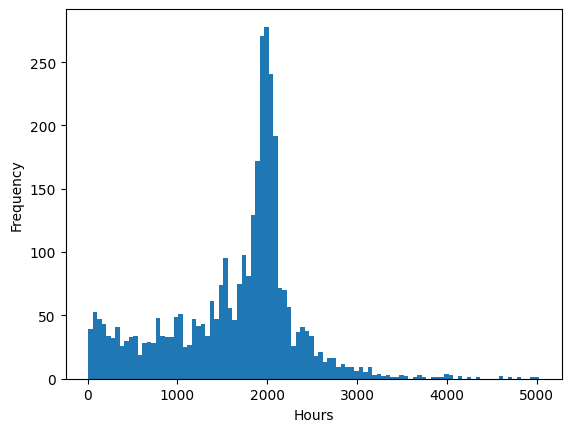

In [19]:
## Removed people who does not work (Hours == 0)
my_data = my_data.drop(my_data[my_data.hours == 0].index)
my_data['hours'].plot(kind='hist', bins=100)
plt.xlabel('Hours')

In [20]:
print("Final statistics of the data")
my_data.describe()

Final statistics of the data


,age,educatn,earnings,hours,kids
count,3469.000000,3469.000000,3469.000000,3469.000000,3469.000000
mean,38.498991,12.885270,18729.002306,1632.637071,2.018449
std,5.449603,2.504226,14883.422994,722.685055,1.337812
min,30.000000,0.000000,0.000000,6.000000,0.000000
25%,34.000000,12.000000,8000.000000,1213.000000,1.000000
50%,38.000000,12.000000,16000.000000,1856.000000,2.000000
75%,43.000000,14.000000,26000.000000,2040.000000,3.000000
max,50.000000,17.000000,140000.000000,5025.000000,10.000000


**Определение независимых и зависимых переменных**

Text(0, 0.5, 'Hours')

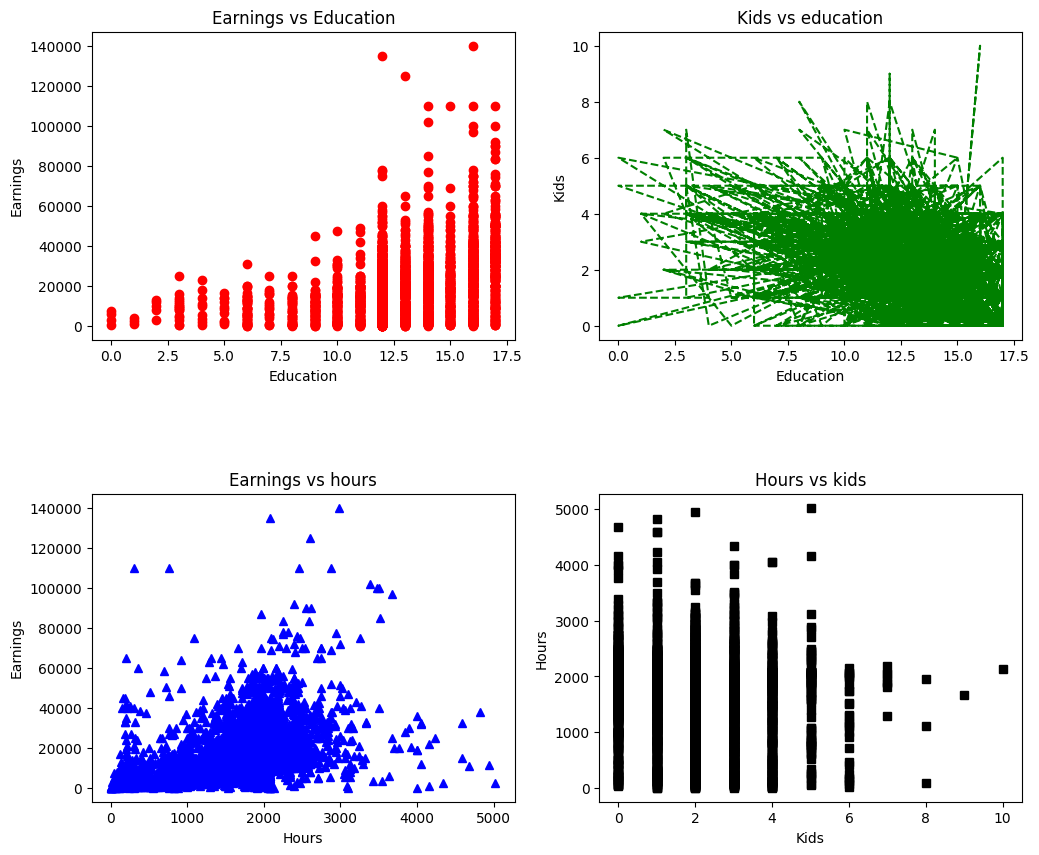

In [21]:
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,2,1)
plt.plot(my_data['educatn'], my_data['earnings'], 'ro')
plt.title('Earnings vs Education')
plt.xlabel("Education")
plt.ylabel("Earnings")

plt.subplot(2,2,2)
plt.plot(my_data['educatn'], my_data['kids'], 'g--')
plt.title('Kids vs education')
plt.xlabel("Education")
plt.ylabel("Kids")

plt.subplot(2,2,3)
plt.plot(my_data['hours'], my_data['earnings'], 'b^')
plt.title('Earnings vs hours')
plt.xlabel("Hours")
plt.ylabel("Earnings")

plt.subplot(2,2,4)
plt.plot(my_data['kids'], my_data['hours'], 'ks')
plt.title('Hours vs kids')
plt.xlabel("Kids")
plt.ylabel("Hours")

#### Определение корреляции между переменными с помощью коэффициента корреляции Пирсона

In [22]:
corr = my_data[['age',\
           'educatn',\
           'earnings',\
           'hours',\
           'kids']].corr()
corr.style.background_gradient(cmap='coolwarm')

,age,educatn,earnings,hours,kids
age,1.000000,-0.011651,0.114818,0.060164,0.155162
educatn,-0.011651,1.000000,0.387013,0.076206,-0.279871
earnings,0.114818,0.387013,1.000000,0.466571,-0.241607
hours,0.060164,0.076206,0.466571,1.000000,-0.116544
kids,0.155162,-0.279871,-0.241607,-0.116544,1.000000


In [23]:
my_data.corr(method='pearson')

ValueError: could not convert string to float: 'married'

#### Построение тепловой карты для наиболее коррелированных атрибутов для «заработка»

Index(['educatn', 'earnings', 'hours', 'kids'], dtype='object')


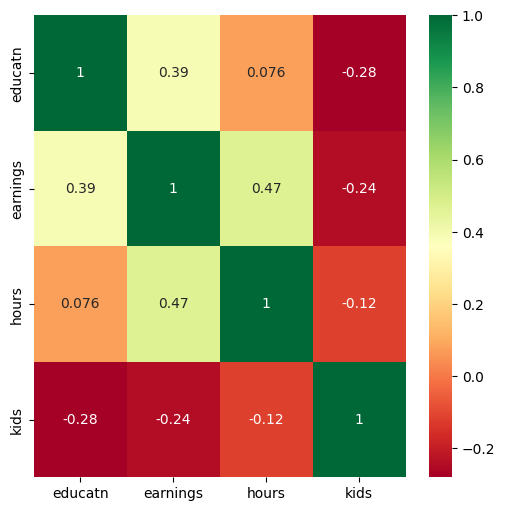

In [24]:
corrValues = my_data.corr(method='pearson', numeric_only = True)
topCorrFeaturesForEarnig = corrValues.index[abs(corrValues['earnings']) >= 0.2]
print(topCorrFeaturesForEarnig)

plt.figure(figsize=(6,6))
ax = sns.heatmap(my_data[topCorrFeaturesForEarnig].corr(), annot=True, cmap="RdYlGn")

#### Можно заметить, что существует высокая (=0,466571) линейная корреляция между «заработком» и «часами».

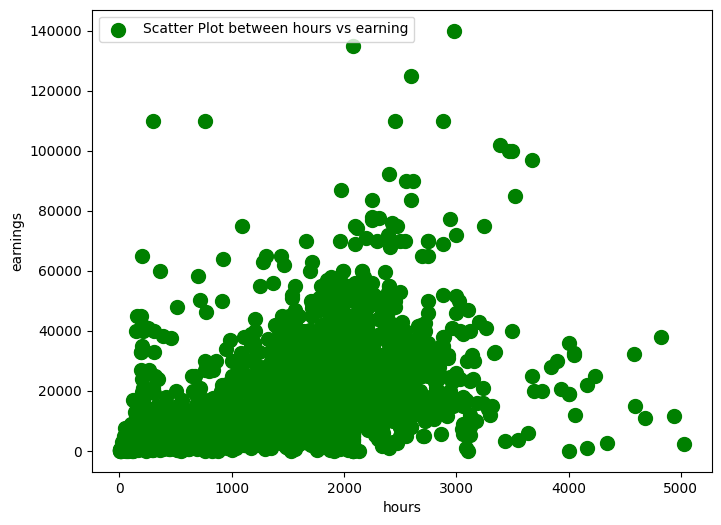

In [25]:
ax = my_data.plot.scatter(x='hours', y='earnings', s=[100], c='green', figsize=(8, 6), label='Scatter Plot between hours vs earning')

<Axes: xlabel='hours', ylabel='earnings'>

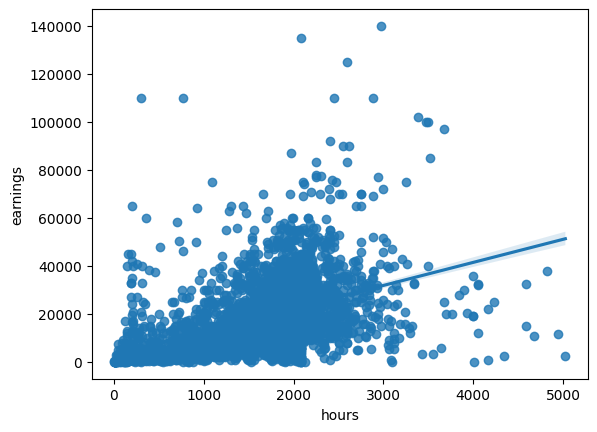

In [26]:
sns.regplot(x="hours", y="earnings", data=my_data)

**Тест на нормальное распределение для переменных часов**

H0:В среднем кооличество времени проведенного на работе не равно доходу
H1:

Если значение p равно <  α :

Отвергните нулевую гипотезу.

In [27]:
H0 = 'Рабочие часы распрделены нормально'
H1 = 'Рабочие часы распрделены не нормально'
k2, p = stat.normaltest(my_data['hours'].sample(50))
alpha = 0.01
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print(H1)
else:
    print(H0)

p = 0.907041
Рабочие часы распрделены нормально


**Извлечение 2 случайных и одинаковых по размеру образцов без замены**

In [28]:
samplingSize = 1000
highLowEarningValMargin = my_data.earnings.median()
print(highLowEarningValMargin)

highEarningsWorkingHours = my_data[my_data.earnings> highLowEarningValMargin].hours
print("High earning people count =", highEarningsWorkingHours.count())

lowEarningsWorkingHours = my_data[my_data.earnings<= highLowEarningValMargin].hours
print("Low earning people count =", lowEarningsWorkingHours.count())

16000.0
High earning people count = 1707
Low earning people count = 1762


In [29]:
Hours_of_high_earnings = my_data[my_data.earnings> highLowEarningValMargin].hours.sample(samplingSize).sort_values()
Hours_of_high_earnings.describe()

,hours
count,1000.000000
mean,1951.856000
std,482.940585
min,122.000000
25%,1800.750000
50%,1960.000000
75%,2116.250000
max,4821.000000


In [30]:
Hours_of_low_earnings = my_data[my_data.earnings<= highLowEarningValMargin].hours.sample(samplingSize).sort_values()
Hours_of_low_earnings.describe()

,hours
count,1000.000000
mean,1317.909000
std,768.191302
min,6.000000
25%,681.250000
50%,1436.000000
75%,1960.000000
max,5025.000000


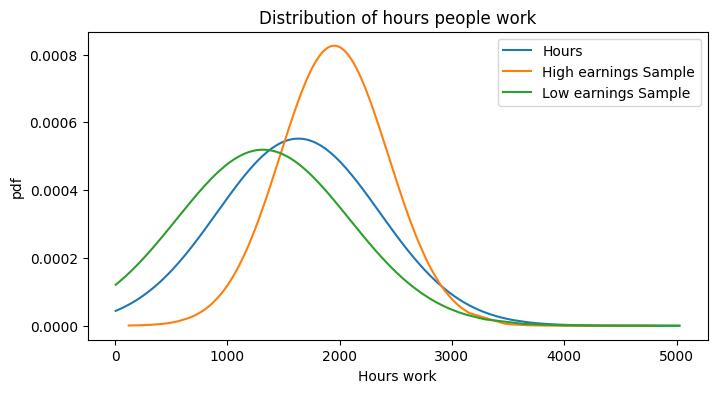

In [31]:
Population = my_data['hours'].sort_values();
PopulationHours = stat.norm.pdf(Population, Population.mean(), Population.std())
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(Population, PopulationHours, label='Hours')

hour_data_fit1 = stat.norm.pdf(Hours_of_high_earnings, Hours_of_high_earnings.mean(), Hours_of_high_earnings.std())
ax.plot(Hours_of_high_earnings, hour_data_fit1, label='High earnings Sample')

hour_data_fit2 = stat.norm.pdf(Hours_of_low_earnings, Hours_of_low_earnings.mean(), Hours_of_low_earnings.std())
ax.plot(Hours_of_low_earnings, hour_data_fit2, label='Low earnings Sample')

plt.title('Distribution of hours people work')
plt.xlabel('Hours work')
plt.ylabel('pdf')
plt.legend()

**Проверка гипотез:<br>  H0 = Люди с высоким или низким заработком работают одинаковое количество часов,<br>Ha = Люди с высоким заработком работают не оодинаково ( больше часов)**

In [32]:
test_leven, p = stat.levene(Hours_of_high_earnings, Hours_of_low_earnings)
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
alpha = 0.05
if p < alpha:
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

Statistics=354.104, p-value=0.000
Отклонить гипотезу о равенстве дисперсий


In [33]:
statistics, p = stat.ttest_ind(Hours_of_high_earnings, Hours_of_low_earnings, equal_var=False)
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('Люди с высоким или низким заработком работают одинаковое количество часов (fail to reject H0)')
else:
	print('Люди с высоким доходом работают больше (отвергаю H0)')

Statistics=22.093, p=0.000
Люди с высоким доходом работают больше (отвергаю H0)


In [34]:
statistics, p = stat.ttest_ind(Hours_of_high_earnings, Hours_of_low_earnings, equal_var=False, alternative='greater')
print('Statistics=%.3f, p=%.3f' % (statistics, p))
# interpret
alpha = 0.05  # 5% area under the normal graph
if p > alpha:
	print('Люди с высоким или низким заработком работают одинаковое количество часов (fail to reject H0)')
else:
	print('Люди с высоким доходом работают больше (отвергаю H0)')

Statistics=22.093, p=0.000
Люди с высоким доходом работают больше (отвергаю H0)
